# Module 4: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand mean intervals and Prediction Intervals through read data applications and visualizations.
2. Observe how CIs and PIs change on different data sets.
3. Observe and analyze interval curvature.
4. Apply understanding of causation to experimental and observational studies.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [7]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)
library(ggplot2)

## Problem 1: Interpreting Intervals

For this problem, we're going to practice creating and interpreting Confidence (Mean) Intervals and Prediction Intervals. To do so, we're going to use data in U.S. State Wine Consumption (millions of liters) and Population (millions).

#### 1. (a) Initial Inspections

Load in the data and create a scatterplot with `population` on the x-axis and `totWine` on the y-axis. For fun, set the color of the point to be `#CFB87C`.

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874
2,Alaska,10.9,0.736879,8.031981
3,Arizona,9.7,6.624617,64.258785
4,Arkansas,4.2,2.958663,12.426385
5,California,14.0,38.335203,536.692842
6,Colorado,8.7,5.267603,45.828146


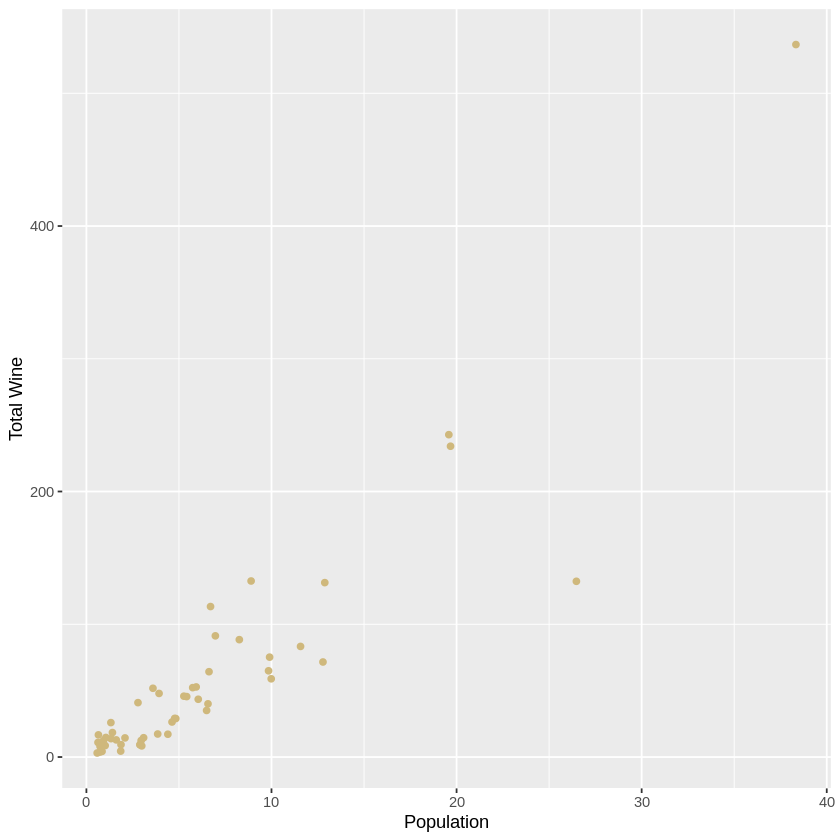

In [8]:
# Load the data
wine.data = read.csv("wine_state_2013.csv")
head(wine.data)

ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point(color = "#CFB87C") +
  labs(x = "Population", y = "Total Wine") 

#### 1. (b) Confidence Intervals

Fit a linear regression with `totWine` as the response and `pop` as the predictor. Add the regression line to your scatterplot. For fun, set its color to gold with `col=#CFB87C`. Add the $90\%$ Confidence Interval for the regression line to the plot.

Then choose a single point-value population and display the upper and lower values for the Confidence Interval at that point. In words, explain what this interval means for that data point.

`geom_smooth()` using formula 'y ~ x'



For a population of 25 , the 90% confidence interval for total wine production is [ 245.0221 , 292.023 ].

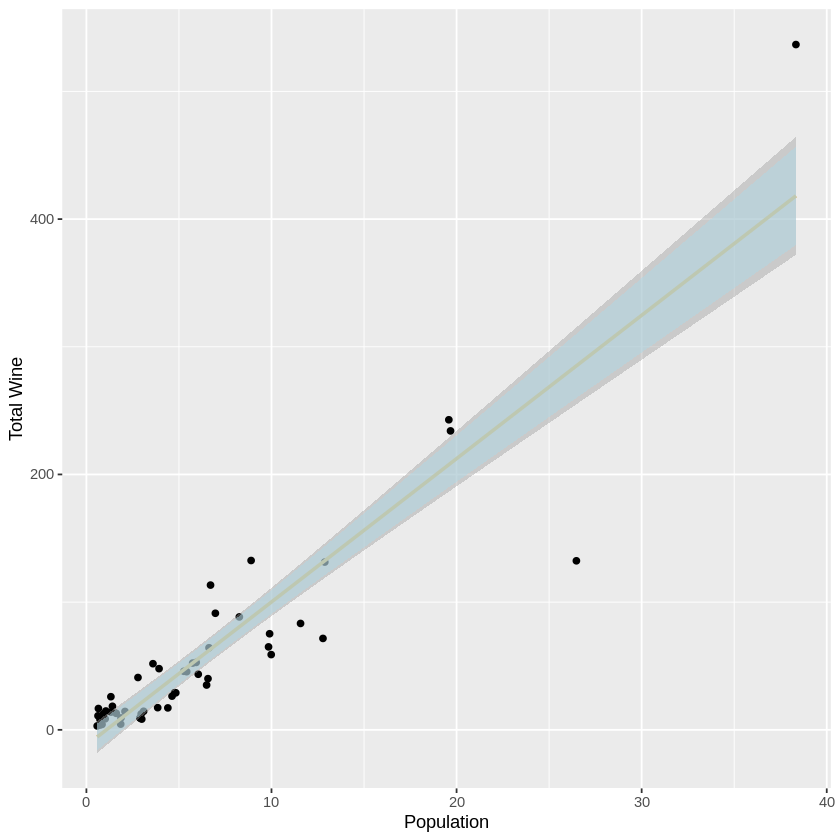

In [9]:
model <- lm(totWine ~ pop, data = wine.data)

conf_int <- predict(model, interval = "confidence", level = 0.90)


ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "#CFB87C") +
  geom_ribbon(aes(ymin = conf_int[, "lwr"], ymax = conf_int[, "upr"]), fill = "lightblue", alpha = 0.5) +
  labs(x = "Population", y = "Total Wine") 


single_pop <- 25


predicted_values <- predict(model, newdata = data.frame(pop = single_pop), interval = "confidence", level = 0.90)


cat("For a population of", single_pop, ", the 90% confidence interval for total wine production is [", 
    predicted_values[1, "lwr"], ",", predicted_values[1, "upr"], "].")

In [10]:
# 1. (c) Prediction Intervals

Using the same `pop` point-value as in **1.b**, plot the prediction interval end points. In words, explain what this interval means for that data point.

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7: unexpected symbol
2: 
3: Using the
         ^


In [ ]:
predicted_values <- predict(model, newdata = data.frame(pop = single_pop), interval = "prediction", level = 0.90)

ggplot(wine.data, aes(x = pop, y = totWine)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = FALSE, color = "#CFB87C") +  # Add regression line without confidence interval
  geom_point(data = data.frame(pop = single_pop, totWine = predicted_values[1, "fit"]), aes(x = pop, y = totWine), color = "red", size = 3, shape = 17) +  # Add point for prediction interval
  geom_segment(aes(x = single_pop, xend = single_pop, y = predicted_values[1, "lwr"], yend = predicted_values[1, "upr"]), color = "red") +  # Add segments for prediction interval
  labs(x = "Population", y = "Total Wine")  # Add axis labels

# Explain the meaning of the prediction interval for the chosen data point
cat("For a population of", single_pop, ", the 90% prediction interval for total wine production is [", 
    predicted_values[1, "lwr"], ",", predicted_values[1, "upr"], "].")

#### 1. (d) Some "Consequences" of Linear Regression

As you've probably gathered by now, there is a lot of math that goes into fitting linear models. It's important that you're exposed to these underlying systems and build an intuition for how certain processes work. However, some of the math can be a bit too... tedious for us to make you go through on your own. Below are a list of "consequences" of linear regression, things that are mathematically true because of the assumptions and formulations of the linear model (let $\widehat\varepsilon_i$ be the residuals of the regression model):

1. $\sum \widehat\varepsilon_i = 0$ : The sum of residuals is 0.
2. $\sum \widehat\varepsilon_i^2$ is as small as it can be.
3. $\sum x_i \widehat\varepsilon_i = 0$
4. $\sum \hat{y}_i \widehat\varepsilon_i = 0$ : The Residuals are orthogonal to the fitted values.
5. The Regression Line always goes through $(\bar{x}, \bar{y})$.

Check that your regression model confirms the "consequences" $1,3,4$ and $5$. For consequence $2$, give a logical reason on why this formulation makes sense.

**Note: even if your data agrees with these claims, that does not prove them as fact. For best practice, try to prove these facts yourself!**

In [17]:

# Calculate residuals
residuals <- residuals(model)

# 1. Sum of residuals is 0
sum_residuals <- sum(residuals)
paste0('#1: sum of residuals = ', sum_residuals, ' which is basically 0')

# 2. Sum of squared residuals is as small as it can be
sum_squared_residuals <- sum(residuals^2)
paste0('#2: sum of squared residuals = ',  sum_squared_residuals, ' which is comparatively small')

# 3. Residuals are orthogonal to the predictor variable
cor_x_residuals <- cor(wine.data$pop, residuals)
paste0('#3: correlation of residuals = ', cor_x_residuals, ' which is basically 0') 

# 4. Residuals are orthogonal to the fitted values
fitted_values <- fitted(model)
cor_fitted_residuals <- cor(fitted_values, residuals)
paste0('#4: correlation of fitted residuals = ', cor_fitted_residuals, ' which is basically 0')

# 5. Regression Line always goes through (x̄, ȳ)
x_bar <- mean(wine.data$pop)
y_bar <- mean(wine.data$totWine)
lm_intercept <- coef(model)[1]
lm_slope <- coef(model)[2]

# Calculate y-intercept based on the formula: y = b0 + b1*x
y_intercept <- lm_intercept + lm_slope * x_bar
paste0('#5: y intercept = ', y_intercept, ' and y bar is ', y_bar)

[1] "#1: sum of residuals = -2.00672811700997e-14 which is basically 0"

[1] "#2: sum of squared residuals = 59325.9321729453 which is comparatively small"

[1] "#3: correlation of residuals = -1.07000227533254e-16 which is basically 0"

[1] "#4: correlation of fitted residuals = -4.78731444282382e-17 which is basically 0"

[1] "#5: y intercept = 57.4796247862745 while y bar is 57.4796247862745"

# Problem 2: Explanation

<img src="xkcd_correlation.png" style="width:600px;"/>

Image Source: https://xkcd.com/552/

Did our wine drinking data come from an experiment or an observational study? Do you think we can infer causation between population and the amount of wine drank from these data?

It appears that the wine drinking data originated from an observational study rather than an experiment. In experiments, researchers usually manipulate or control variables to determine causation, whereas observational studies collect data without directly manipulating or controlling variables.

Establishing a causal relationship solely based on observational data presents a challenge. Observational studies lack the ability to control all potential confounding variables, leaving room for other factors or variables to influence both population size and wine consumption.

# Problem 3: Even More Intervals!

We're almost done! There is just a few more details about Confidence Intervals and Perdiction Intervals which we want to go over. How does changing the data affect the confidence interval? That's a hard question to answer with a single dataset, so let's simulate a bunch of different datasets and see what they intervals they produce.

#### 3. (a) Visualize the data

The code cell below generates 20 data points from two different normal distributions. Finish the code by fitting a linear model to the data and plotting the results with ggplot, with Confidence Intervals for the mean and Prediction Intervals included. 

Experiment with different means and variances. Does changing these values affect the CI or PI?

In [18]:
gen_data <- function(mu1, mu2, var1, var2){
    # Function to generate 20 data points from 2 different normal distributions.
    x.1 = rnorm(10, mu1, 2)
    x.2 = rnorm(10, mu2, 2)
    y.1 = 2 + 2*x.1 + rnorm(10, 0, var1)
    y.2 = 2 + 2*x.2 + rnorm(10, 0, var2)

    df = data.frame(x=c(x.1, x.2), y=c(y.1, y.2))
    return(df)
}

set.seed(0)
head(gen_data(-8, 8, 10, 10))

,x,y
,<dbl>,<dbl>
1,-5.474091,-11.1908617
2,-8.652467,-11.5309770
3,-5.340401,-7.3474393
4,-5.455141,-0.8683876
5,-7.170717,-12.9125020
6,-11.079900,-15.1237204


Warning message in predict.lm(lm_gen, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”
`geom_smooth()` using formula 'y ~ x'

Warning message in predict.lm(lm_gen2, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”
`geom_smooth()` using formula 'y ~ x'



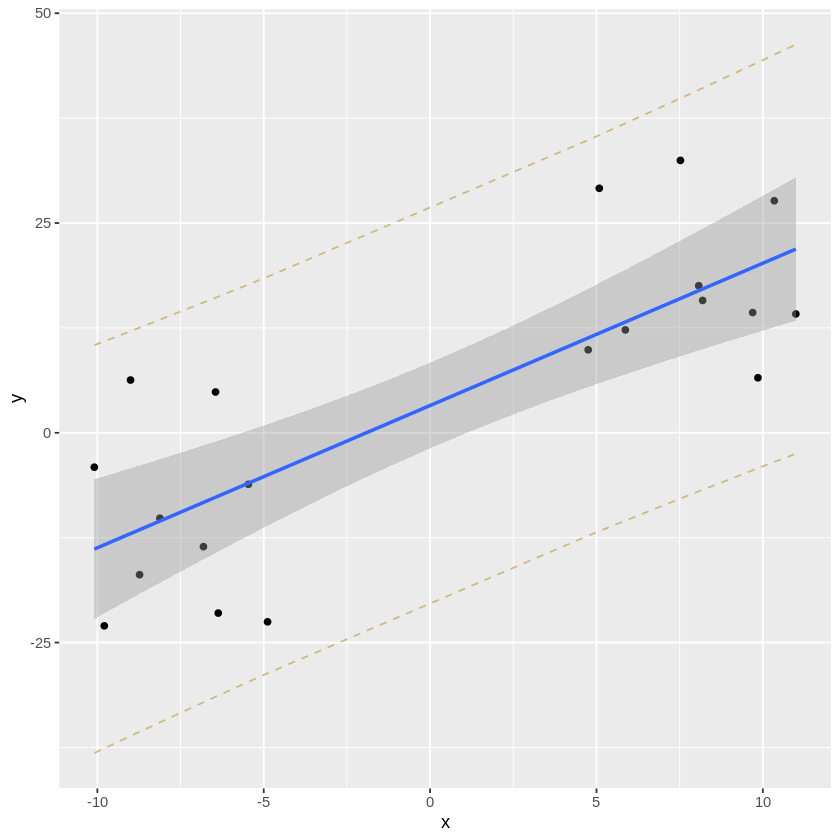

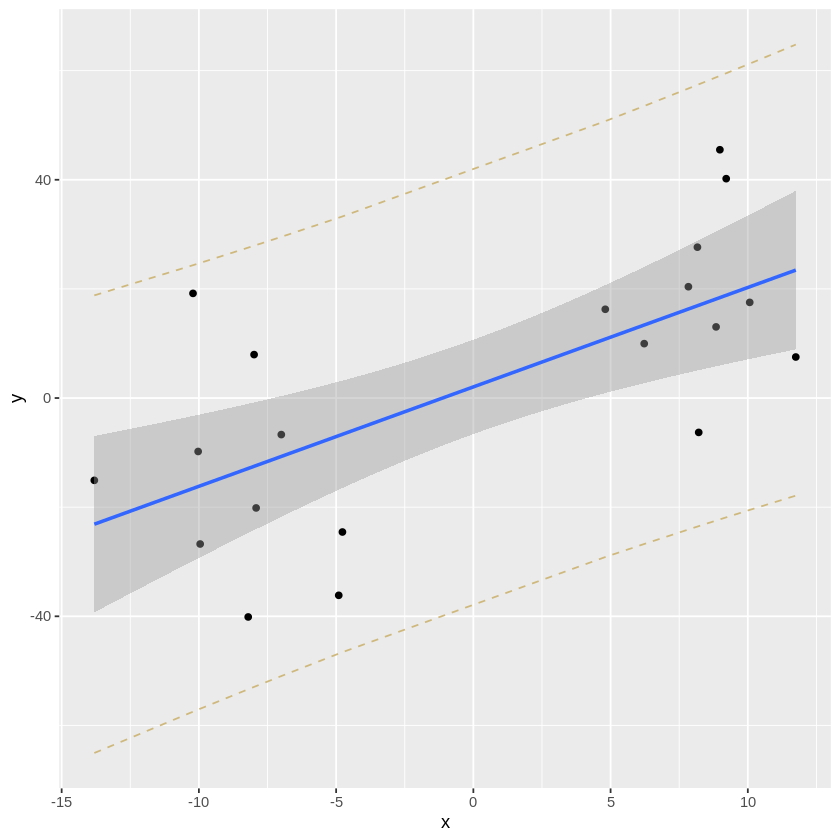

In [22]:
df = gen_data(-8, 8, 10, 10)
lm_gen = lm(y ~ x, data = df)
df.pred = predict(lm_gen, interval="prediction", level=0.95)

df.fit = df.pred[,1]
df.upper = df.pred[,3]
df.lower = df.pred[,2]
ggplot(df, aes(x, y))+geom_point() +
    geom_line(aes(y=df.lower),color = "#CFB87C", linetype = "dashed")+
    geom_line(aes(y=df.upper),color = "#CFB87C", linetype = "dashed")+
    geom_smooth(method=lm, se=TRUE)
    
df2 = gen_data(-8, 8, 15, 15)
lm_gen2 = lm(y ~ x, data = df2)
df2.pred = predict(lm_gen2, interval="prediction", level=0.95)
df2.fit = df2.pred[,1]
df2.upper = df2.pred[,3]
df2.lower = df2.pred[,2]
ggplot(df2, aes(x, y))+ geom_point() +
    geom_line(aes(y=df2.lower), color = "#CFB87C", linetype = "dashed")+
    geom_line(aes(y=df2.upper), color = "#CFB87C", linetype = "dashed")+
    geom_smooth(method=lm, se=TRUE)

As the variance increases, the confidence and prediction intervals also widen, and conversely, as the variance decreases, these intervals become narrower.

#### 3. (b) The Smallest Interval

Recall that the Confidence (Mean) Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

where $\hat{y}_h$ is the fitted response for predictor value $x_h$, $t_{\alpha/2,n-2}$ is the t-value with $n-2$ degrees of freedom and $MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_h - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)$ is the standard error of the fit.

From the above equation, what value of $x_k$ would result in the CI with the shortest width? Does this match up with the simulated data? Can you give an intuitive reason for why this occurs?

the value where x_k is would results int he CI with the shorted width is when x_k = x_bar

# 3. (c) Interviewing the Intervals

Recall that the Prediction Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \Big( 1 + \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

Does the "width" of the Prediction Interval change at different population values? Explain why or why not.

Yes, the width of the prediction interval is dependent on xk in the formula. 

## Problem 4: Causality

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

1. The fundamental problem lies in determining if an observed relationship indicates causation due to confounding variables and the inability to observe counterfactual outcomes. This problem is closely related to the counterfactual definition of causality, which asserts that causality is defined by comparing actual outcomes with what would have happened under different conditions.

2. Using "close substitutes" involves comparing outcomes between those exposed to a treatment and those exposed to a similar but distinct alternative. This approach helps approximate counterfactual scenarios, mitigating the influence of confounding variables and providing a basis for estimating causal effects.

3. eterministic theories assert a direct, predictable relationship between cause and effect, while probabilistic theories acknowledge uncertainty, allowing for randomness and variation in outcomes even under the same conditions. Deterministic theories assume strict determinism in causation, whereas probabilistic theories accommodate uncertainty in causal relationships.

## Problem 5: Causal inference and ethics

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the quantitative ventures to compute 'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (300-500 words) summarizing this debate. Some important items to consider:**

1. How does the "fundamental problem of causal inference" play out in these discussions?


2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"?


3. What role do assumptions (both statistical and otherwise) play in this debate? To what extent are assumptions made by different researchers falsifiable?



The debate surrounding the study of racial discrimination in the criminal justice system encapsulates the complex interplay between theoretical, empirical, and normative considerations, with the fundamental problem of causal inference at its core.
At the heart of this debate lies the challenge of disentangling causality from correlation, known as the fundamental problem of causal inference. Researchers grapple with the difficulty of attributing observed outcomes, such as disparities in law enforcement practices based on race, to specific causal factors. This challenge is exacerbated by the multifaceted nature of social phenomena and the inherent limitations of observational data.

One contentious issue revolves around the use of arrest data from administrative police records to measure the causal effects of race. Critics argue that such data may suffer from various distortionary effects, which can bias the estimation of racial discrimination. For example, if racially biased policing practices result in disproportionate arrests of individuals from certain racial groups, the observed correlations between race and arrest rates may not accurately reflect underlying causal relationships. Moreover, the nature of police encounters and the subjective judgments made by law enforcement officers further complicate the interpretation of arrest data in assessing racial discrimination.

Assumptions, both statistical and substantive, play a pivotal role in shaping this debate. Statistical assumptions, such as the independence of errors or the absence of confounding variables, underpin the validity of causal inference methods. However, these assumptions are often contested, and their validity may vary depending on the context and the underlying social dynamics. Furthermore, substantive assumptions about the nature of racial discrimination and the mechanisms through which it operates influence the design and interpretation of statistical models. These assumptions are subject to empirical scrutiny but may also reflect researchers' normative and theoretical perspectives.

The falsifiability of assumptions made by different researchers varies, with some being more empirically testable than others. Statistical assumptions, such as the randomness of sampling or the linearity of relationships, can be evaluated through rigorous hypothesis testing and sensitivity analyses. However, substantive assumptions about the role of race in policing practices or the existence of systemic biases may be more difficult to falsify definitively. Nevertheless, ongoing empirical research and interdisciplinary dialogue can help elucidate the validity of these assumptions and inform more nuanced understandings of racial discrimination in the criminal justice system.
